This notebook shows how to use the global_biases diagnostic.

The `GlobalBiases` class provides an easy interface to plot 2D biases maps for a given experiment and a variables with respect to some observational data.

Let's plot the global mean temperature for the historical experiment, with a comparison done with the same ERA5 time span and 1990-1999 climatology.

In [1]:
from aqua import Reader
from aqua.diagnostics import GlobalBiases

In [2]:
reader_ifs_nemo = Reader(model = 'IFS-NEMO', exp = 'historical-1990', source = 'lra-r100-monthly')
data_ifs_nemo = reader_ifs_nemo.retrieve(startdate="1990-01-01", enddate="1999-12-31")

reader_era5 = Reader(model="ERA5", exp="era5", source="monthly")
data_era5 = reader_era5.retrieve(startdate="1990-01-01", enddate="1999-12-31")


2024-11-20 18:11:33 :: Reader :: WARNING  -> FDB_PATH parameter is required but is missing, setting to default 
2024-11-20 18:11:33 :: Reader :: WARNING  -> FDB_PATH_HISTORICAL parameter is required but is missing, setting to default 
2024-11-20 18:11:33 :: Reader :: WARNING  -> FDB_PATH_EERIE parameter is required but is missing, setting to default 
2024-11-20 18:11:33 :: Reader :: WARNING  -> ECCODES_PATH parameter is required but is missing, setting to default 
2024-11-20 18:11:33 :: Reader :: WARNING  -> The requested default fixer name IFS-NEMO-default does not exist in fixes files
2024-11-20 18:11:33 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly


In [3]:
global_biases = GlobalBiases(data=data_ifs_nemo, data_ref=data_era5, var_name='2t', loglevel = 'INFO',
                              model="IFS-NEMO", exp="historical-1990", startdate_data="1990-01-01", enddate_data="1999-31-12",
                              model_obs="ERA5", startdate_obs="1990-01-01", enddate_obs="1999-31-12")

2024-11-20 17:23:58 :: Atmospheric global :: INFO     -> Plotting global biases.
2024-11-20 17:23:58 :: Atmospheric global :: INFO     -> Plotting bias map between two datasets.


(<Figure size 1100x850 with 2 Axes>,
 <GeoAxes: title={'center': '2t global bias of IFS-NEMO historical-1990 1990-01-01/1999-31-12\nrelative to ERA5 climatology 1990-01-01/1999-31-12\n'}, xlabel='lon', ylabel='latitude [degrees_north]'>)

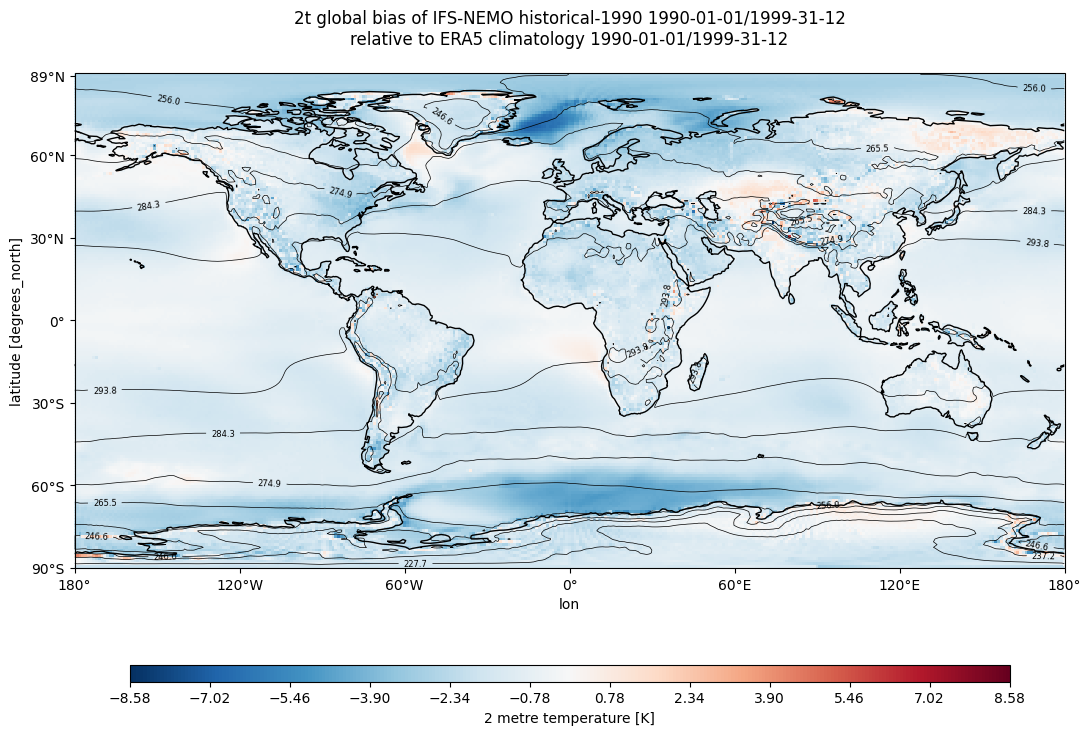

In [5]:
global_biases.plot_bias()

Let's now plot the seasonal bias:

2024-11-20 16:59:20 :: Atmospheric global :: INFO     -> Plotting seasonal biases.
/work/bb1153/b382321/mambaforge/envs/aqua/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'add_labels'
  result = super().contourf(*args, **kwargs)
/work/bb1153/b382321/mambaforge/envs/aqua/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'add_labels'
  result = super().contourf(*args, **kwargs)
/work/bb1153/b382321/mambaforge/envs/aqua/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'add_labels'
  result = super().contourf(*args, **kwargs)
/work/bb1153/b382321/mambaforge/envs/aqua/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1646: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'add_labels'
  result = super().contour

(<Figure size 1100x850 with 5 Axes>,
 array([<GeoAxes: title={'center': 'DJF'}, xlabel='Longitude [deg]', ylabel='Latitude [deg]'>,
        <GeoAxes: title={'center': 'MAM'}, xlabel='Longitude [deg]', ylabel='Latitude [deg]'>,
        <GeoAxes: title={'center': 'JJA'}, xlabel='Longitude [deg]', ylabel='Latitude [deg]'>,
        <GeoAxes: title={'center': 'SON'}, xlabel='Longitude [deg]', ylabel='Latitude [deg]'>],
       dtype=object))

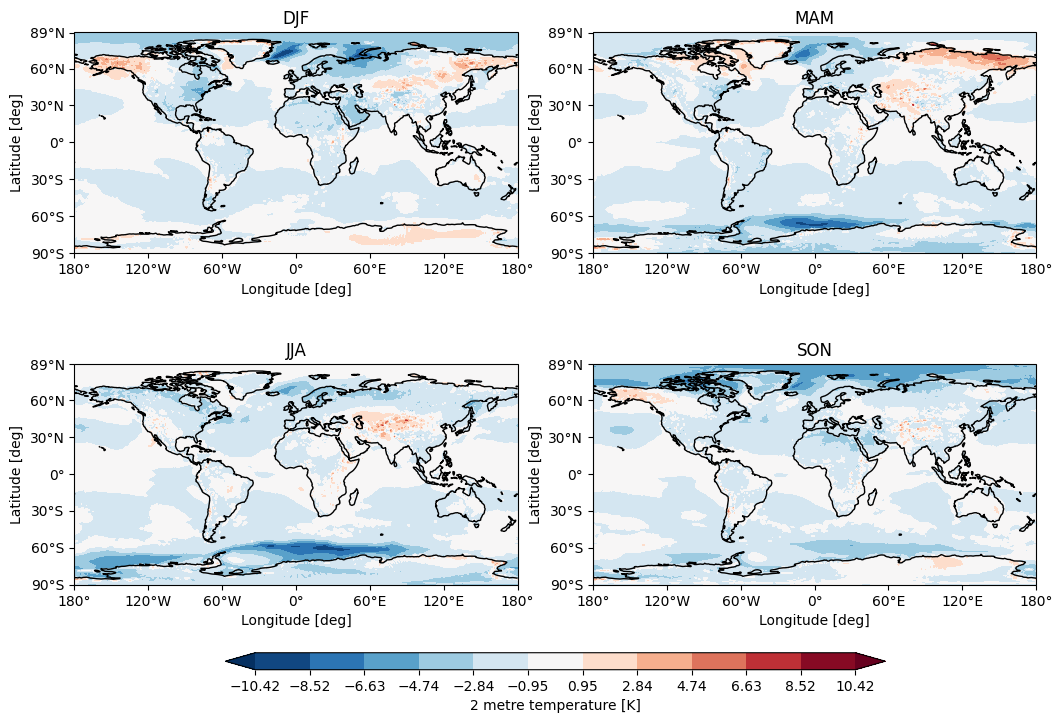

In [12]:
global_biases.plot_seasonal_bias()

We can also plot the vertical bias profile as a function of pressure levels:

2024-11-20 18:12:09 :: Atmospheric global :: INFO     -> Plotting vertical biases.


(<Figure size 1000x800 with 2 Axes>,
 <Axes: title={'center': 'q vertical bias of IFS-NEMO historical-1990 1990-01-01/1999-31-12\nrelative to ERA5 climatology 1990-01-01/1999-31-12\n'}, xlabel='Latitude', ylabel='Pressure Level (Pa)'>)

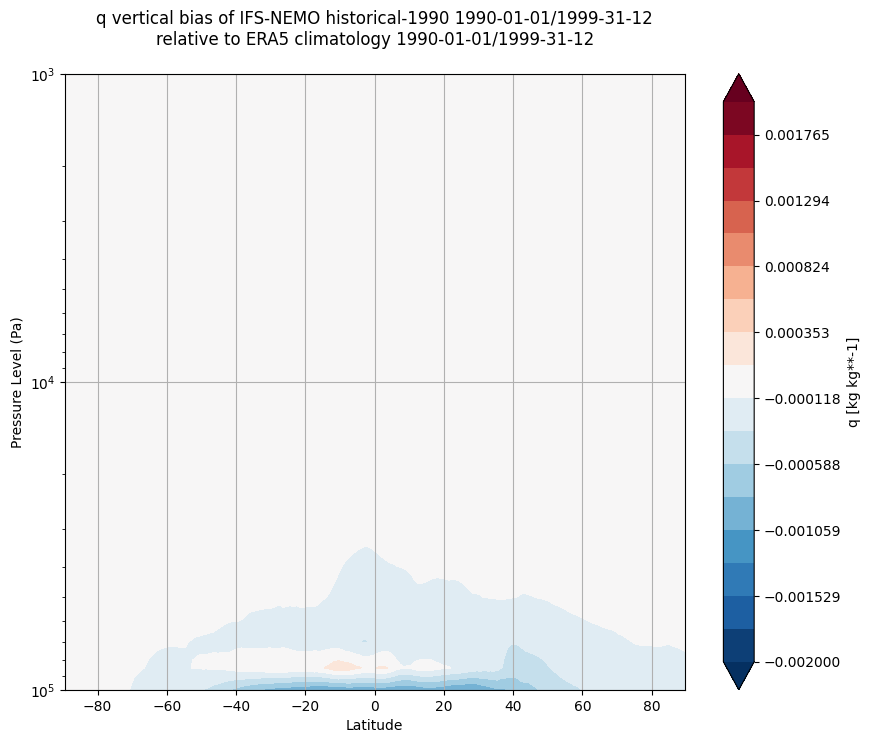

In [4]:
global_biases.plot_vertical_bias(data=data_ifs_nemo, data_ref=data_era5, var_name='q', vmin= -0.002, vmax= 0.002)